In [1]:
import sys
import os
sys.path.insert(0, '../ghtesting')

import matplotlib.pyplot as plt
import pandas as pd
from ghdatabase import GHDatabase
from ghrepo import GHRepo

In [2]:
plt.style.use(['science'])

In [3]:
db = GHDatabase('ecs260', 'webframework_repos', os.environ['CONNECTION_STRING'])

repos = list(db.get_repos())

num_repos = len(repos)
print(f'Number of repos: {num_repos}')

Number of repos: 7644


In [4]:
rows = []

for repojson in repos:
    repo = GHRepo(repojson)
#     print(repo.url)
#     print(repo.badges[0])
    new_row = dict()
    new_row['name'] = repo.name
    for b in repo.badges[0]:
        new_row[b] = True
    rows.append(new_row)
    
df = pd.DataFrame(rows)
df = df.fillna(False).replace(1.0, True)
df

,name,github,travisci,saucelabs,circleci,azure_pipelines,appveyorci,semaphoreci,gitlab,buildkite,codeship,teamcity,wercker,shippable,bitrise
0,ajenti/ajenti,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,icescrum/iceScrum,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,handsontable/handsontable,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,acidb/mobiscroll,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,sectore/CafeTownsend-Angular-Rails,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,ggymm/data-view-web,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7640,lo4396ve/vue-analysis,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7641,oceanengine/okeedesign-mobile-vue,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7642,liyupi/father,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/tmp/ipykernel_3174424/3458523503.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0, repo_cis_series.max() + 5000])


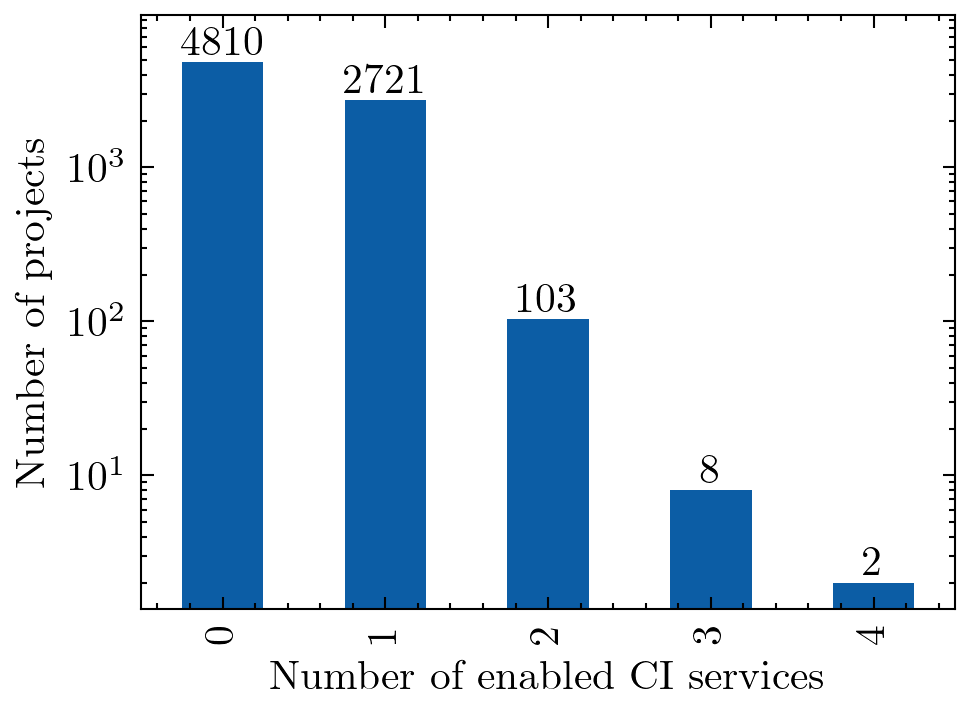

In [5]:
fig, ax = plt.subplots(dpi=300)

repo_cis_series = df[df.columns[1:]].sum(axis=1).sort_values(ascending=False).value_counts().astype(int)


ci_redun_plot = repo_cis_series.plot.bar(#title='CI Service Redundancy',
    ylabel='Number of projects'
    , xlabel='Number of enabled CI services'
    , logy=True
    , ax=ax)

ax.set_ylim([0, repo_cis_series.max() + 5000])
ci_redun_plot.bar_label(ci_redun_plot.containers[0])

fig.savefig('../plots/ci-service-redundancy.pdf', transparent = True, bbox_inches = 'tight', dpi=300)

/tmp/ipykernel_3174424/3084889950.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('../plots/ci-service-usage.pdf', transparent = True, bbox_inches = 'tight', pad=0, dpi=300)


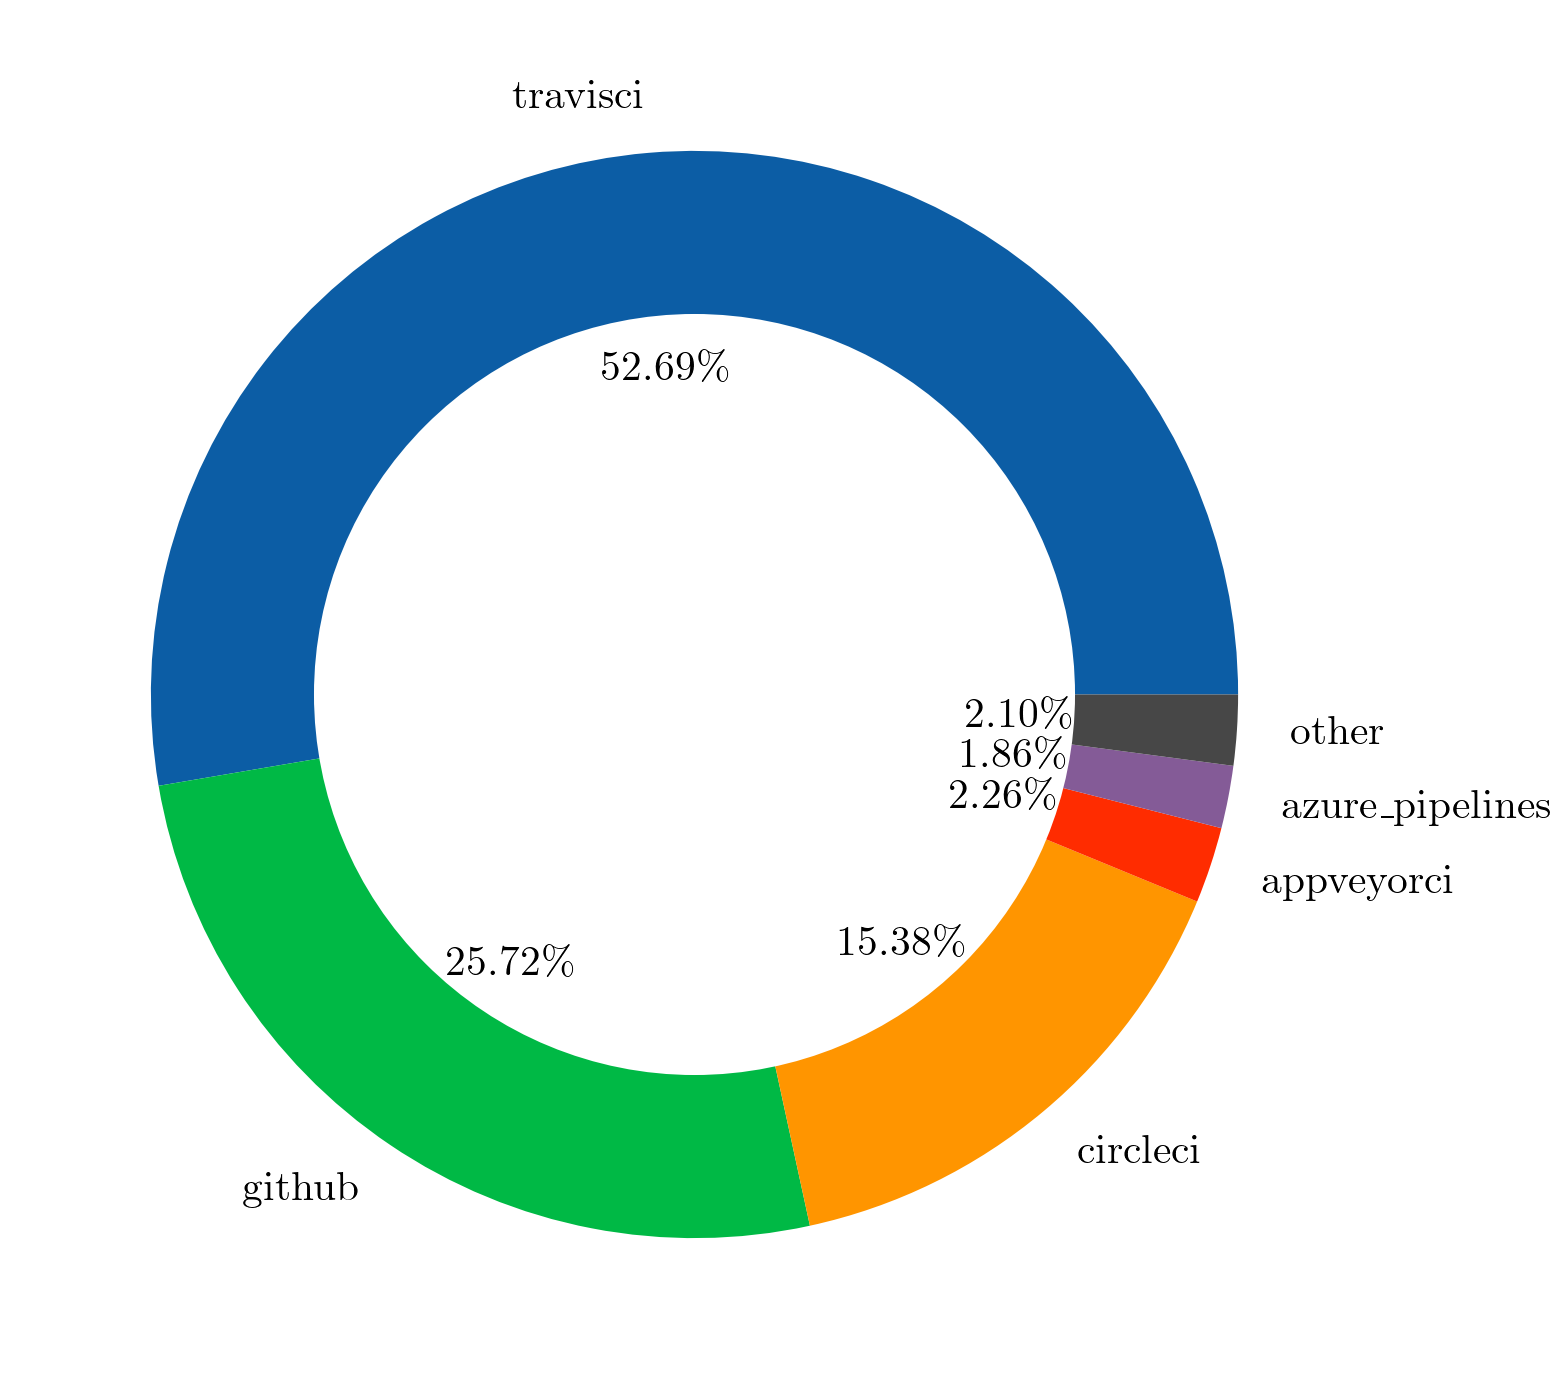

In [6]:
fig, ax = plt.subplots(dpi=300)
ci_series = df[df.columns[1:]].sum().sort_values(ascending=False)
ci_series['other'] = 0
for idx, val in ci_series.items():
    if idx == 'other':
        continue
    if val < 50:
        ci_series['other'] = ci_series['other'] + val
        ci_series.drop(idx, inplace=True)

ci_series.plot.pie(#     title='CI Service Usage',
                ylabel=''
               , figsize=(6,6)
               , legend=False
               , ax=ax
               , autopct='%1.2f\%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)



fig.savefig('../plots/ci-service-usage.pdf', transparent = True, bbox_inches = 'tight', pad=0, dpi=300)

In [7]:
langs = []
for repojson in repos:
    repo = GHRepo(repojson)
#     print(repo.url)
#     print(repo.badges[0])
    new_row = dict()
    new_row['name'] = repo.name
    l = repo.primarylanguage
    new_row[l] = True
    langs_df = langs.append(new_row)
    
langs_df = pd.DataFrame(langs)
langs_df = langs_df.fillna(False).replace(1.0, True)
langs_df

,name,Python,Groovy,JavaScript,Ruby,Java,Scala,TypeScript,n/a,PHP,...,Rust,Objective-C++,GLSL,WebAssembly,Blade,Batchfile,Julia,Svelte,TSQL,Liquid
0,ajenti/ajenti,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,icescrum/iceScrum,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,handsontable/handsontable,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,acidb/mobiscroll,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,sectore/CafeTownsend-Angular-Rails,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,ggymm/data-view-web,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7640,lo4396ve/vue-analysis,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7641,oceanengine/okeedesign-mobile-vue,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7642,liyupi/father,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/tmp/ipykernel_3174424/2104692151.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0, lang_series.max() + 10000])


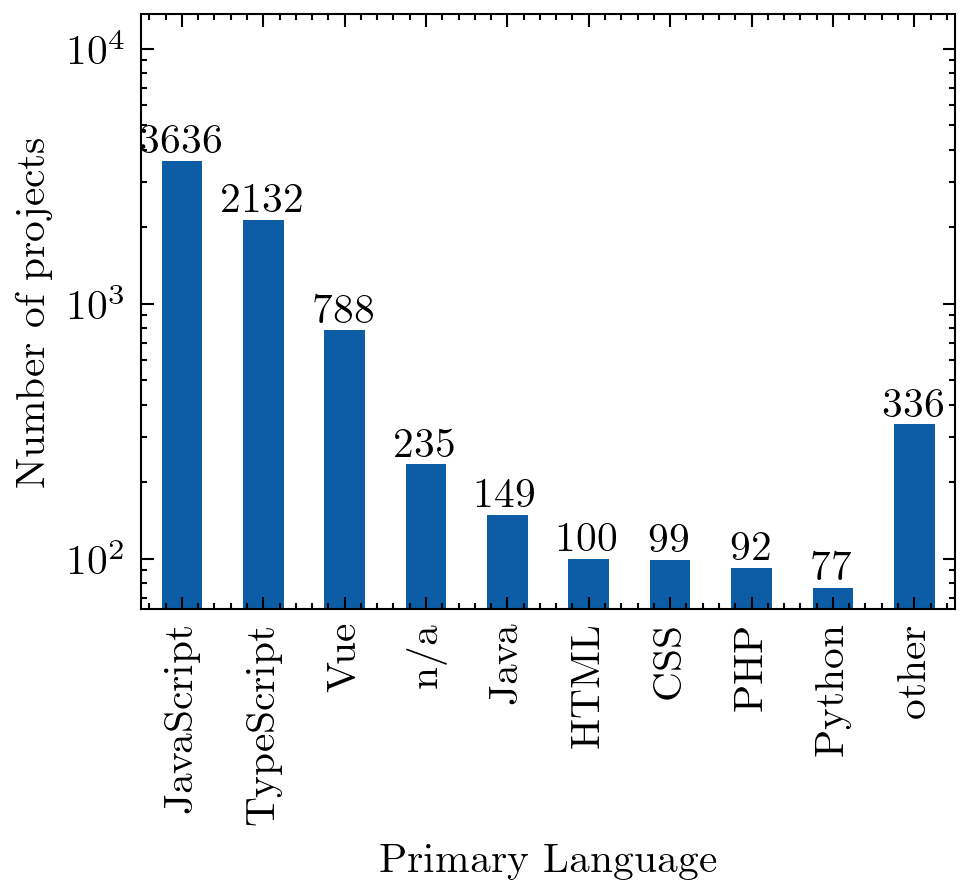

In [8]:
fig, ax = plt.subplots(dpi=300)

lang_series = langs_df[langs_df.columns[1:]].sum().sort_values(ascending=False)
lang_series['other'] = 0
for idx, val in lang_series.items():
    if idx == 'other':
        continue
    if val < 75:
        lang_series['other'] = lang_series['other'] + val
        lang_series.drop(idx, inplace=True)

lang_plot = lang_series.plot.bar(#title='Project Primary Language',
               ylabel='Number of projects'
               , xlabel='Primary Language'
#                , figsize=(6,6)
               , logy=True
               , ax=ax
               , legend=False)

ax.set_ylim([0, lang_series.max() + 10000])
lang_plot.bar_label(lang_plot.containers[0])

fig.savefig('../plots/project-primary-language.pdf', transparent = True, bbox_inches = 'tight', dpi=300)

In [9]:
topics = []
for repojson in repos:
    repo = GHRepo(repojson)
#     print(repo.url)
#     print(repo.badges[0])
    new_row = dict()
    new_row['name'] = repo.name
    webtopics = ['angular', 'react', 'vue']
    for t in webtopics:
        if t in repo.topics:
            new_row[t] = True
    topics_df = topics.append(new_row)

topics_df = pd.DataFrame(topics)
topics_df = topics_df.fillna(False).replace(1.0, True)
topics_df

,name,angular,react,vue
0,ajenti/ajenti,True,False,False
1,icescrum/iceScrum,True,False,False
2,handsontable/handsontable,True,True,True
3,acidb/mobiscroll,True,True,False
4,sectore/CafeTownsend-Angular-Rails,True,False,False
...,...,...,...,...
7639,ggymm/data-view-web,False,False,True
7640,lo4396ve/vue-analysis,False,False,True
7641,oceanengine/okeedesign-mobile-vue,False,False,True
7642,liyupi/father,False,False,True


In [10]:
from matplotlib_venn import venn3
webtopics = ['angular', 'react', 'vue']

t_df=topics_df.drop('name', axis=1).groupby(webtopics, as_index=False).size()
t_df

,angular,react,vue,size
0,False,False,True,2122
1,False,True,False,4344
2,False,True,True,148
3,True,False,False,873
4,True,False,True,8
5,True,True,False,58
6,True,True,True,91


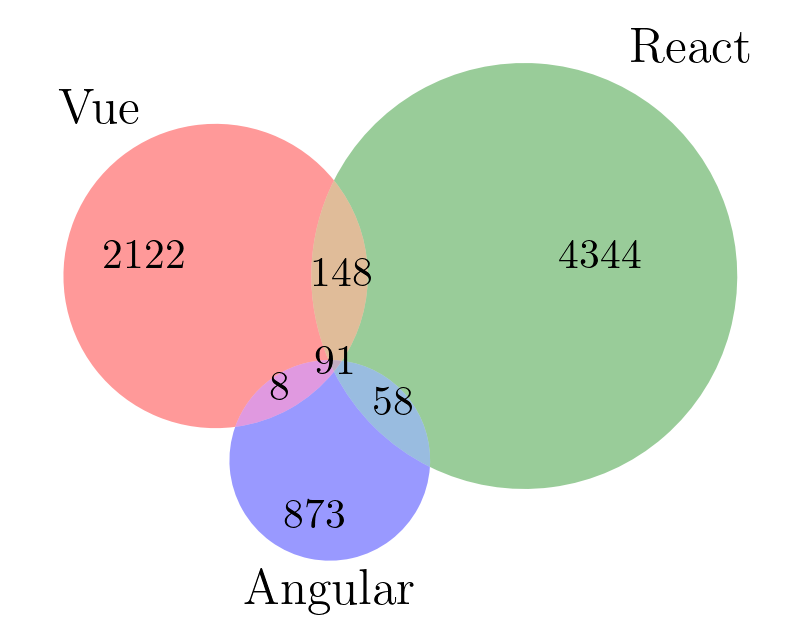

In [11]:
fig, ax = plt.subplots(dpi=300)
# https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc
# https://pypi.org/project/matplotlib-venn/
sets = tuple(t_df['size'])

# print(sets)
# plt.title('Projects with Web Framework Topics')
venn3(subsets = sets
      , set_labels = ('Vue', 'React', 'Angular'), ax=ax)

fig.savefig('../plots/project-webframework-venn.pdf', transparent = True, bbox_inches = 'tight', dpi=300)

In [12]:
topicci = []
webtopics = ['angular', 'react', 'vue']
for t in webtopics:
    new_row = dict()
    new_row['framework'] = t
    for repojson in repos:
        repo = GHRepo(repojson)
        if t not in repo.topics:
            continue
    #     print(repo.url)
    #     print(repo.badges[0])

        for b in repo.badges[0]:
            new_row[b] = new_row.get(b, 0) + 1

    topicci_df = topicci.append(new_row)
    
topicci_df = pd.DataFrame(topicci)    
topicci_df = topicci_df.fillna(0)
topicci_df

,framework,github,travisci,saucelabs,circleci,azure_pipelines,appveyorci,semaphoreci,gitlab,buildkite,codeship,teamcity,wercker,shippable,bitrise
0,angular,127,280,9,88,19,12,3,2,1.0,0.0,0.0,0.0,0.0,0.0
1,react,493,999,7,279,30,36,3,6,3.0,6.0,2.0,3.0,2.0,2.0
2,vue,192,331,2,118,16,19,2,5,0.0,3.0,0.0,1.0,3.0,0.0


In [13]:
topicci_dfT = topicci_df.set_index('framework').T

In [14]:
topiccipct_df = pd.DataFrame()
topiccipct_df['Angular'] = topicci_dfT['angular'] / topicci_dfT['angular'].sum()
topiccipct_df['React'] = topicci_dfT['react'] / topicci_dfT['react'].sum()
topiccipct_df['Vue'] = topicci_dfT['vue'] / topicci_dfT['vue'].sum()

In [15]:
topiccipct_df.reindex(['travisci', 'github', 'circleci', 'appveyorci', 'azure_pipelines'])

,Angular,React,Vue
travisci,0.517560,0.533939,0.478324
github,0.234750,0.263495,0.277457
circleci,0.162662,0.149118,0.170520
appveyorci,0.022181,0.019241,0.027457
azure_pipelines,0.035120,0.016034,0.023121


In [16]:
topic_ci_en = []
webtopics = ['angular', 'react', 'vue']
for t in webtopics:
    new_row = dict()
    new_row['framework'] = t
    for repojson in repos:
        repo = GHRepo(repojson)
        if t not in repo.topics:
            continue
    #     print(repo.url)
    #     print(repo.badges[0])
        if len(list(repo.badges[0])) > 0:
            new_row['has_ci'] = new_row.get('has_ci', 0) + 1
        else:
            new_row['no_ci'] = new_row.get('no_ci', 0) + 1


    topic_ci_en.append(new_row)
    
    
topic_ci_en_df = pd.DataFrame(topic_ci_en)
topic_ci_en_df = topic_ci_en_df.fillna(0)
topic_ci_en_df = topic_ci_en_df.set_index('framework').T
topic_ci_en_df

framework,angular,react,vue
no_ci,525,2834,1707
has_ci,505,1807,662


In [17]:
topic_ci_en_pct_df = pd.DataFrame()
topic_ci_en_pct_df['Angular'] = topic_ci_en_df['angular']['has_ci'] / topic_ci_en_df['angular'].sum()
topic_ci_en_pct_df['React'] = topic_ci_en_df['react']['has_ci'] / topic_ci_en_df['react'].sum()
topic_ci_en_pct_df['Vue'] = topic_ci_en_df['vue']['has_ci'] / topic_ci_en_df['vue'].sum()

# topiccipct_df['React'] = topicci_dfT['react'] / topicci_dfT['react'].sum()
# topiccipct_df['Vue'] = topicci_dfT['vue'] / topicci_dfT['vue'].sum() 
topic_ci_en_pct_df

,Angular,React,Vue


In [18]:
print(topic_ci_en_df['angular']['has_ci'] / topic_ci_en_df['angular'].sum())
print(topic_ci_en_df['react']['has_ci'] / topic_ci_en_df['react'].sum())
print(topic_ci_en_df['vue']['has_ci'] / topic_ci_en_df['vue'].sum())

0.49029126213592233
0.38935574229691877
0.27944280287040946
